# Exercice 1 : Le jeu de la vie

## Question 1 à 3 :

### 1)
Nous commmençons par créer notre chaîne de caractères

In [107]:
filename="HMMA238_TP_emmasantinelli.ipynb"
print(filename)

HMMA238_TP_emmasantinelli.ipynb


### 2)
Nous créons une variable qui compte le nombre de caractères de notre chaîne. 

In [108]:
taille_str=len(filename)
print(taille_str)

31


### 3)
Nous créons une variable qui vaut le reste de la division euclidienne de taille_str
par 6 

In [109]:
ma_graine=taille_str%3
print(ma_graine)

1


# Implémentation sans numpy

## Question 4 à 6 :

Nous commençons par définir la fonction calculant le nombre de cellule voisines  

In [110]:
def calcul_nb_voisins(Z):
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                + Z[x-1][y] + 0 +Z[x+1][y] \
                + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N

### 4)
Nous définissons la liste K et nous lui appliquons la fonction définie plus haut.

In [111]:
Z = [[0,0,0,0,0,0],[0,0,0,1,0,0],[0,1,0,1,0,0],[0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
print(calcul_nb_voisins(Z))

[[0, 0, 0, 0, 0, 0], [0, 1, 3, 1, 2, 0], [0, 1, 5, 3, 3, 0], [0, 2, 3, 2, 2, 0], [0, 1, 2, 2, 1, 0], [0, 0, 0, 0, 0, 0]]


Z représente la matrice d'entrée.
La sortie "calcul_nb_voisins(Z)" représente le nombre pour chaque entrée (elle vaut 0 sur le pourtour).

Nous définissons la fonction "iteration_jeu()", puis nous affichons les 10 premières itérations du jeu.

In [112]:
def iteration_jeu(Z):
    """Cette fonction a pour but de compter le nombre d'itération du jeu de la vie"""
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

In [113]:
print(iteration_jeu(Z))

[[0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 1, 0], [0, 0, 1, 1, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]]


Nous importons tous les packages dont nous aurons besoin pour la suite de l'exercice

In [114]:
import matplotlib.pyplot as plt
from matplotlib import pyplot 
import numpy as np

### 5)
Nous commençons par transformer ces listes en tableau afin d'utiliser les fonctions imshow et subplot. Nous affichons ensuite les 10 premières itérations du jeu.

<IPython.core.display.Javascript object>


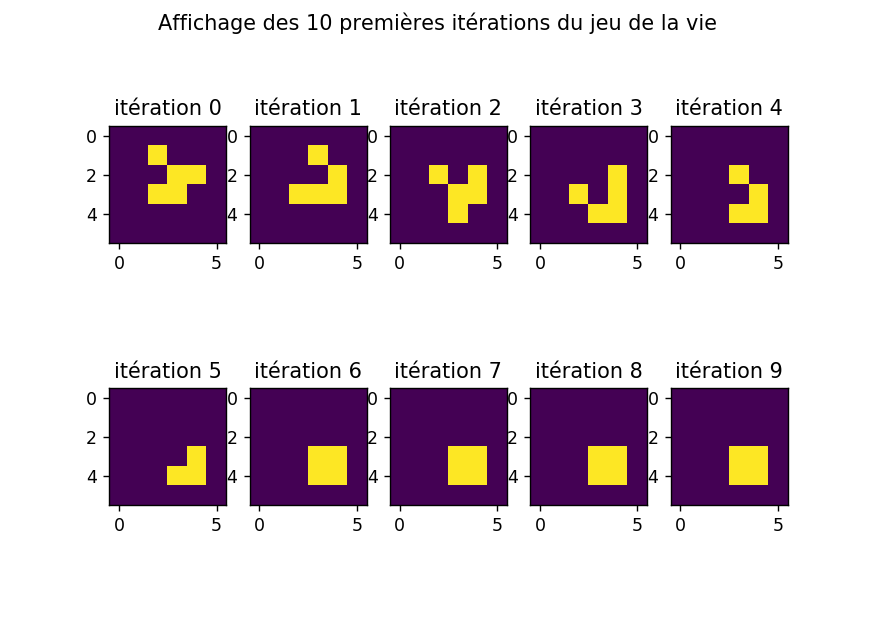

In [115]:
z=np.asarray(Z)
plt.figure(figsize=(7, 5))
for i in range(10):
    if i == 0:
        plt.subplot(2, 5, 1)
        plt.imshow(z)
    else:
        plt.subplot(2,  5,  i+1)
        plt.imshow(iteration_jeu(z))
    plt.title("itération" + " " + str(i))
    plt.suptitle("Affichage des 10 premières itérations du jeu de la vie")


### 6)
Par cet affichage, nous remarquons que de l'itération 0 à l'itération 4 les cellules commencent par se déplacer du haut gauche de la grille vers le bas droit. Puis, à partir de l'itération 6, elles se regroupent vers le bas droit de la grille pour se stabiliser à ce même emplacement jusqu'à l'itération 9. Ceci implique qu'à partir d'une certaine itération le jeu n'évolue plus, en effet, toutes les cellules restent à la même place.

# Implémentation avec numpy

## Question 7 à 10 :

### 7) 
Nous créons un vecteur "vect" composé des nombres 1 et 0. Le nombre 0 permet de rendre inactif le pourtour de la grille.Nous créons un vecteur composé uniquement de 0, que l'on nomme "nb_vect".
Puis nous remplaçons l'interieur de ce dernier (nous laissons sa première et sa dernière coordonée égale à 0) par la somme des 4 premières coordonnées du vecteur "vec" et de ses 4 dernières coordonnées.

In [27]:
vect = np.array([0,1,0,0,1,1])
print(vect)
print(vect[:-2])
print(vect[2:])
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1] += (vect[:-2] + vect[2:])
print(nb_vect)

[0 1 0 0 1 1]
[0 1 0 0]
[0 0 1 1]
[0. 0. 1. 1. 1. 0.]


### 8)
Nous souhaitons créer une fonction calcul_nb_voisins_np qui prend en entrée une matrice Z et qui ressort le nombre de voisins pour chaque entrée (et qui vaut zéro sur le pourtour). Cette focntion s'appliquera sur des arrays. Nous allons nous servir slicing (vu à la question précédente) pour créer cette fonction.

In [32]:

def calcul_nb_voisins_np(Z):
    nb_voisins = np.zeros(Z.shape)
    nb_voisins[1:-1, 1:-1] = Z[:-2, :-2] + Z[1:-1, :-2] + Z[2:, :-2] + \
        Z[:-2, 1:-1] + Z[2:, 1:-1] + Z[:-2, 2:] + Z[1:-1, 2:] + Z[2:, 2:]
    return(nb_voisins)

### 9)
Nous souhaitons créer une fonction iteration_jeu_np, similaire à iteration_jeu mais qui prend comme
entrée sortie des numpy array et non plus des listes de listes. Nous utiliserons la question
précédente pour cela.


In [33]:
    
def iteration_jeu_np(Z):
    forme = Z.shape
    N = calcul_nb_voisins_np(Z)
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0  # la cellule meurt
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1  # la cellule nait
    return(Z)

### 10)
Nous souhaitons créer une fonction jeu_np qui prend en entrée une matrice initiale Z_in et un nombre
d'itérations nb_iter et sort une matrice (de même taille que Z_in) décrivant l'état du jeu de la vie
après nb_iter itérations


In [118]:
Z_in = np.asarray(Z)
def jeu_np(Z_in, nb_iter):
    for i in range(nb_iter-1):
        iteration_jeu_np(Z_in)
    plt.imshow(iteration_jeu(Z_in))
    plt.title("Affichage l'itération numéro : " + str(nb_iter))

Nous appliquons cette fonction sur un exemple : nous gardons la même matrice Z et nous regardons l'état du jeu aprés 4 itérations.

<IPython.core.display.Javascript object>


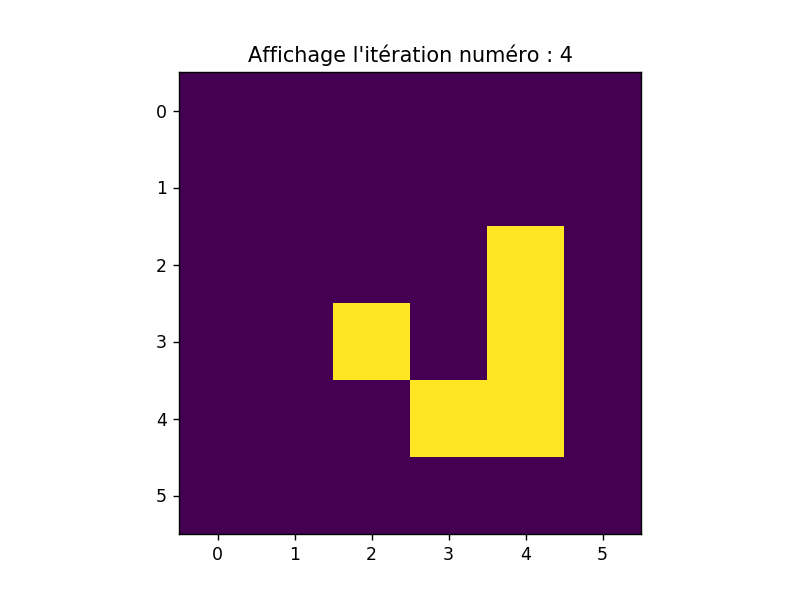

In [119]:
Z = [[0,0,0,0,0,0],[0,0,0,1,0,0],[0,1,0,1,0,0],[0,0,1,1,0,0],[0,0,0,0,0,0],[0,0,0,0,0,0]]
nb_iter=4
jeu_np(Z_in,nb_iter)

# Animation :

### 11)
Nous commencons par définir une nouvelle matrice : Z_huge.
Puis nous affichons un film  qui représente les itérations du jeu de la vie quand on initialise avec la matrice Z_huge.
Nous utiliserons la commande animation.FuncAnimation.

In [47]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
[[0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])
Z_huge[10:16, 10:16] = Z_np
print(Z_huge)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [98]:
%matplotlib notebook
from matplotlib import animation


def animer(Z):
    fig = plt.gcf()
    im = plt.imshow(Z)
    plt.show()
    plt.title("Film représentant les itérations du jeu")


    def animate(i):
        im.set_data(iteration_jeu_np(Z))
        return im,

    anim = animation.FuncAnimation(fig, animate,
                               frames=200, interval=20, blit=True)

    return(anim)

<IPython.core.display.Javascript object>


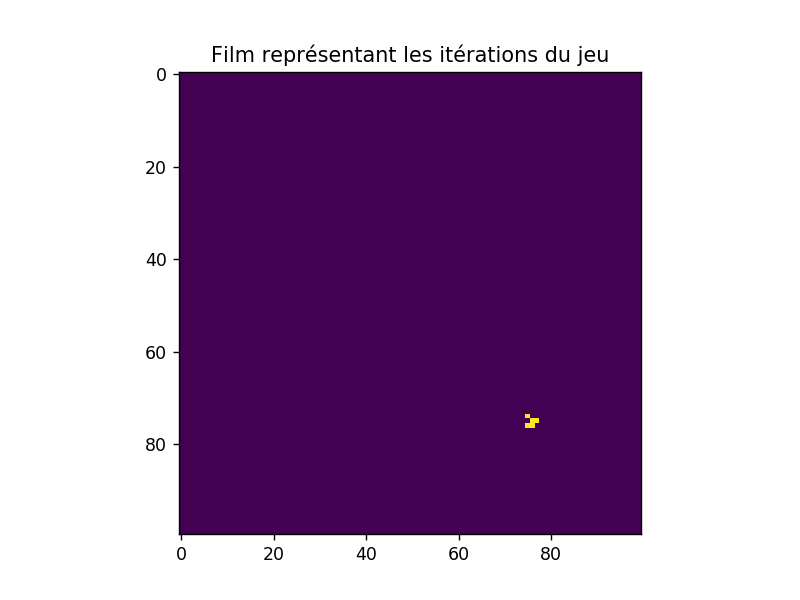

In [99]:
Z= Z_huge
animer(Z)

### 12)
Nous créeons une matrice aléatoire de taille 100ˆ100, remplie de 1 et de 0, et dont la proportion de 1 est (en espérance) égale à (1 + ma_graine) * 10 / 100.

In [96]:
B = (1 + ma_graine) * 10 / 100.
print(B)
n=1
p=B
A = np.random.binomial(n, p, size=(100,100))
print(A)

0.2
[[0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]]


Nous affichons le film représentant les itérations du jeu de la vie quand on initialise avec la matrice A (définie ci-dessus)

<IPython.core.display.Javascript object>


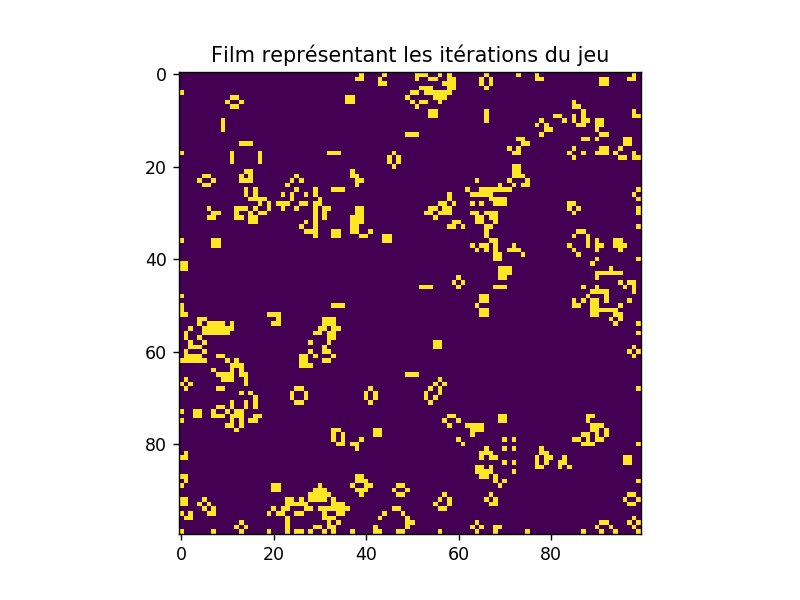

In [100]:
Z= A
animer(Z)


### 13)
Nous commençons par afficher trois matrices simples qui représentent des jeux qui sont fixes dans le temps (configuration stables) et 10 itérations d'un jeu initialisé avec elles de taille 50 * 50.

Nous affichons ensuite une matrice qui représente un jeu dont l'état oscille avec une période de deux (et qui ne
comporte pas uniquement des valeurs nulles).